<a href="https://colab.research.google.com/github/sebibita/CIS376TermProject/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Code
Before getting started we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

### Google Colab Setup
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Now recall the path in your Google Drive where you uploaded this notebook, fill it in below. If everything is working correctly then running the following cell should print the filenames from the assignment:

```
['HW4.ipynb', 'hw_lib']
```

In [5]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "HW4"
assert GOOGLE_DRIVE_PATH_AFTER_MYDRIVE is not None
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['HW4.ipynb', '.DS_Store', 'hw_lib']


Once you have successfully mounted your Google Drive and located the path to this assignment, run the following cell to allow us to import from the `.py` files of this assignment.
If everything works correctly, you should see
```
Hello Deep Learning
```

In [6]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

from hw_lib import utils
from importlib import reload
reload(utils)

utils.hello()

Hello Deep Learning


# Fill your UMID and unique name

Now find `um_id()` and `unique_name()` and implement them.
**This is required before turning in your assigments because this makes sure auto-grading system can assign grades correctly to you.**

In [17]:
from hw_lib import utils
from importlib import reload
reload(utils)

sebibita = utils.unique_name()
assert sebibita is not None
print(sebibita)

sebibita


In [18]:
from hw_lib import utils
from importlib import reload
reload(utils)

my_um_id = utils.um_id()
print(my_um_id)

assert my_um_id == "99878610"
assert isinstance(my_um_id, str)
assert len(my_um_id) == 8


99878610


# A Linear Classifier on a Toy Example (50 pts)

### A Class Example Walk-Through (25 pts)

This initial example will precisely align with the one we have in our class.

Let's begin by setting up the linear classifier's weights as a $3 \times 2$ matrix and the biases as a $3 \times 1$ vector. Based on the dimensions of the weights matrix, we can infer that there are 3 classes (indicated by the number of rows) and the feature dimension is 2. Therefore, the operation
$Wx + b$ should be applicable.

In [68]:
import numpy as np
weights = np.array([[0.1, 0.1], [0.2, 0.2], [0.3, 0.3]])
biases = np.array([0.1, 0.2, 0.3]).reshape(3, 1)

We generate a single data sample `(X1, y1)`, with `X1` representing the input data and `y1` denoting the ground truth label $1$. It's important to utilize `reshape` to ensure that the input data X is formed into a $ 2 \times 1$  vector.

In [69]:
X1 = np.array([1,2]).reshape(2, 1)
y1 = np.array([1])

**-----IMPLEMENTATION NEEDED----- (10 pts)**

In this part, your task is to code the `cross_entropy_loss` function within `linear_classification.py`. This function should accept $2 \times 1$ input data and label, along with weights and biases, then return the cross entropy loss and prediction probability. The cross entropy loss is expected to be a scalar, while the prediction probability should be a $3 \times 1$ vector, reflecting the three classes. Refer to the function parameters for additional specifics.

In [70]:
import numpy as np
from hw_lib import linear_classification
from importlib import reload
reload(linear_classification)

e1, prob1 = linear_classification.cross_entropy_loss(X1, weights, biases, y1)

assert np.isscalar(e1) is True, "e1 should be a scalar"
assert prob1.shape == (3, 1), "prob1.shape should be (3, 1)"

expected_e1 = 1.1512505137284939
expected_prob1 = np.array([[0.21198272],
       [0.31624106],
       [0.47177622]])

print(f"{e1=}\n{prob1=}")

assert np.allclose(e1, expected_e1)
assert np.allclose(prob1, expected_prob1)

e1=np.float64(1.1512505137284939)
prob1=array([[0.21198272],
       [0.31624106],
       [0.47177622]])


Likewise, we generate another single data sample input `(X2, y2)`, where the ground truth label `y2` is $2$.

In [71]:
import numpy as np
from hw_lib import linear_classification
from importlib import reload
reload(linear_classification)

X2 = np.array([2,3]).reshape(2, 1)
y2 = np.array([2])
e2, prob2 = linear_classification.cross_entropy_loss(X2, weights, biases, y2)

expected_e2 = 0.615188800169685
expected_prob2 = np.array([[0.16280717],
       [0.296654  ],
       [0.54053883]])

print(f"{e2=}\n{prob2=}")

assert np.allclose(e2, expected_e2)
assert np.allclose(prob2, expected_prob2)

e2=np.float64(0.615188800169685)
prob2=array([[0.16280717],
       [0.296654  ],
       [0.54053883]])


Remember, we calculate the loss as the mean of all error terms. Therefore, we compute the initial_loss using the method outlined below.

In [72]:
initial_loss = (e1 + e2) / 2
print(f"Inital total loss is \n{initial_loss=}")

Inital total loss is 
initial_loss=np.float64(0.8832196569490894)


**-----IMPLEMENTATION NEEDED----- (10 pts)**

In this section, you are tasked with coding the `compute_gradients` function in `linear_classification.py`. Typically, computing the loss and gradient would be integrated within a single Python class (a concept we'll explore in a subsequent example) to ensure the gradients are directly associated with the specified loss. Here, it's presumed we'll apply the cross-entropy loss as defined previously. For this purpose, you'll need the input data $X$, the data label $y1$, and the predicted probabilities $prob$.

First, we'll calculate the gradients of the weights and biases for the first error term $e1$, followed by $e2$. To conclude, we must average the two gradients to determine the final gradients, reflecting that our loss term represents the average of two error terms.

In [73]:
from hw_lib import linear_classification
from importlib import reload
reload(linear_classification)

de1_dW, de1_db = linear_classification.compute_gradients(X1, prob1, y1)
print(f"Gradients of e1 term are \n{de1_dW=} and \n{de1_db=}")

expected_de1_dW=np.array([[ 0.21198272,  0.42396544],
       [-0.68375894, -1.36751788],
       [ 0.47177622,  0.94355244]])
expected_de1_db=np.array([[ 0.21198272],
       [-0.68375894],
       [ 0.47177622]])

assert np.allclose(expected_de1_dW, de1_dW)
assert np.allclose(expected_de1_db, de1_db)

Gradients of e1 term are 
de1_dW=array([[ 0.21198272,  0.42396544],
       [-0.68375894, -1.36751788],
       [ 0.47177622,  0.94355244]]) and 
de1_db=array([[ 0.21198272],
       [-0.68375894],
       [ 0.47177622]])


In [74]:
from hw_lib import linear_classification
from importlib import reload
reload(linear_classification)

de2_dW, de2_db = linear_classification.compute_gradients(X2, prob2, y2)
print(f"Gradients of e1 term are \n{de2_dW=} and \n{de2_db=}")

expected_de2_dW=np.array([[ 0.32561433,  0.4884215 ],
       [ 0.593308  ,  0.889962  ],
       [-0.91892234, -1.3783835 ]])
expected_de2_db=np.array([[ 0.16280717],
       [ 0.296654  ],
       [-0.45946117]])

assert np.allclose(expected_de2_dW, de2_dW)
assert np.allclose(expected_de2_db, de2_db)

Gradients of e1 term are 
de2_dW=array([[ 0.32561433,  0.4884215 ],
       [ 0.593308  ,  0.889962  ],
       [-0.91892234, -1.3783835 ]]) and 
de2_db=array([[ 0.16280717],
       [ 0.296654  ],
       [-0.45946117]])


We will perform the averaging of the gradients in this step.

In [75]:
dL_dW = (de1_dW + de2_dW) / 2
dL_db = (de1_db + de2_db) / 2

expected_dL_dW=np.array([[ 0.26879853,  0.45619347],
       [-0.04522547, -0.23877794],
       [-0.22357306, -0.21741553]])

expected_dL_db=np.array([[ 0.18739494],
       [-0.19355247],
       [ 0.00615753]])
print(f"Gradients are \n{dL_dW=} and \n{dL_db=}")

assert np.allclose(expected_dL_dW, dL_dW)
assert np.allclose(expected_dL_db, dL_db)


Gradients are 
dL_dW=array([[ 0.26879853,  0.45619347],
       [-0.04522547, -0.23877794],
       [-0.22357306, -0.21741553]]) and 
dL_db=array([[ 0.18739494],
       [-0.19355247],
       [ 0.00615753]])


**-----IMPLEMENTATION NEEDED----- (5 pts)**

You are required to implement the `update_parameters` function within `linear_classification.py` to execute a basic gradient update. For more information, please consult the function's docstrings.

We will assign the learning rate a value of $0.5$.

In [76]:

from hw_lib import linear_classification
from importlib import reload
reload(linear_classification)

learning_rate = 0.5
new_weights, new_biases = linear_classification.update_parameters(weights, biases, dL_dW, dL_db, learning_rate)
expected_new_weights = np.array([[-0.03439926, -0.12809674],
       [ 0.22261274,  0.31938897],
       [ 0.41178653,  0.40870777]])

expected_new_biases = np.array([[0.00630253],
       [0.29677624],
       [0.29692124]])

print(f"New weights and bias are \n{new_weights=} and \n{new_biases=}")

assert np.allclose(expected_new_weights, new_weights)
assert np.allclose(expected_new_biases, new_biases)

New weights and bias are 
new_weights=array([[-0.03439926, -0.12809674],
       [ 0.22261274,  0.31938897],
       [ 0.41178653,  0.40870777]]) and 
new_biases=array([[0.00630253],
       [0.29677624],
       [0.29692124]])


Now, we'll recalculate the loss to verify if it has decreased.

In [77]:
reload(linear_classification)
new_e1, _ = linear_classification.cross_entropy_loss(X2, new_weights, new_biases, y1)
new_e2, _ = linear_classification.cross_entropy_loss(X2, new_weights, new_biases, y2)
new_loss = (new_e1 + new_e2) / 2
print(f"\n{initial_loss=}\n{new_loss=}")

assert new_loss < initial_loss

expected_new_loss = 0.7838816829913788
assert np.allclose(expected_new_loss, new_loss)



initial_loss=np.float64(0.8832196569490894)
new_loss=np.float64(0.7838816829913788)


Increasing the learning rate will affect the size of the steps taken during the gradient descent updates. A higher learning rate means the updates to the weights and biases will be larger, potentially leading to faster convergence towards the minimum loss. However, if the learning rate is too high, it may cause the updates to overshoot the minimum, resulting in instability or divergence in the loss values. It's crucial to find a balanced learning rate that is neither too small to cause slow convergence nor too large to prevent convergence altogether.

In [78]:
learning_rate = 10
reload(linear_classification)

new_weights, new_biases = linear_classification.update_parameters(weights, biases, dL_dW, dL_db, learning_rate)
new_e1, _ = linear_classification.cross_entropy_loss(X2, new_weights, new_biases, y1)
new_e2, _ = linear_classification.cross_entropy_loss(X2, new_weights, new_biases, y2)
new_loss = (new_e1 + new_e2) / 2
print(f"\n{initial_loss=}\n{new_loss=}")

assert new_loss > initial_loss


initial_loss=np.float64(0.8832196569490894)
new_loss=np.float64(0.9606786680045059)


### Same Class Example with Matrix Input Handling in Code (25 pts)

**-----IMPLEMENTATION NEEDED----- (25 pts)**

Instead of processing a single vector input at a time and then averaging the final loss, we aim to process a batch of input samples simultaneously. The results should align exactly with our previous approach. Your code may require adjustments to handle multidimensional input. The matrix's columns represent individual samples, while its rows correspond to the feature dimensions. This arrangement aligns with our classroom discussions. However, when using PyTorch or other Python libraries, attention to the feature dimension is crucial. Using np.array $([[1,2], [2,3]]).T$ ensures that matches the example in the class.

In [79]:
import numpy as np

from hw_lib import linear_classification
from importlib import reload
reload(linear_classification)

X = np.array([[1,2], [2,3]]).T
labels = np.array([1, 2])
weight = np.array([[0.1, 0.1], [0.2, 0.2], [0.3, 0.3]])
bias = np.array([0.1, 0.2, 0.3]).reshape(3, 1)
loss, prob = linear_classification.cross_entropy_loss(X, weight, bias, labels)

expected_loss = 0.8832196569490894
expected_prob = np.array([[0.21198272, 0.16280717],
       [0.31624106, 0.296654  ],
       [0.47177622, 0.54053883]])

print(f"{loss=}\n{prob=}")

assert np.allclose(expected_loss, loss)
assert np.allclose(expected_prob, prob)


loss=np.float64(0.8832196569490894)
prob=array([[0.21198272, 0.16280717],
       [0.31624106, 0.296654  ],
       [0.47177622, 0.54053883]])


**-----IMPLEMENTATION NEEDED----- (25 pts)**

In this approach, we aim to process a batch of input samples collectively. The expectation is to achieve the same results as previously obtained. It may not be necessary to alter your code to handle multidimensional input for gradient calculation purposes.

In [80]:
from importlib import reload
reload(linear_classification)

dW, db = linear_classification.compute_gradients(X, prob, labels)

expected_dW=np.array([[ 0.26879853,  0.45619347],
       [-0.04522547, -0.23877794],
       [-0.22357306, -0.21741553]])

expected_db=np.array([[ 0.18739494],
       [-0.19355247],
       [ 0.00615753]])

print(f"Gradients of weights and bias are \n{dW=} and \n{db=}")

assert np.allclose(expected_dW, dW)
assert np.allclose(expected_db, db)

Gradients of weights and bias are 
dW=array([[ 0.26879853,  0.45619347],
       [-0.04522547, -0.23877794],
       [-0.22357306, -0.21741553]]) and 
db=array([[ 0.18739494],
       [-0.19355247],
       [ 0.00615753]])


Here, we are dealing with 3 data samples. By using $X = np.array([[1,2], [2,3], [3, 4]]).T$, we ensure that the matrix has 2 rows representing the feature dimensions and 3 columns, each corresponding to a separate data sample.

In [81]:
import numpy as np

from hw_lib import linear_classification
from importlib import reload
reload(linear_classification)

X = np.array([[1,2], [2,3], [3, 4]]).T
labels = np.array([1, 2, 0])
weight = np.array([[0.1, 0.1], [0.2, 0.2], [0.3, 0.3]])
bias = np.array([0.1, 0.2, 0.3]).reshape(3, 1)
loss, prob = linear_classification.cross_entropy_loss(X, weight, bias, labels)

expected_loss = 1.2893190141882505
expected_prob = np.array([[0.21198272, 0.16280717, 0.12227071],
       [0.31624106, 0.296654  , 0.27211848],
       [0.47177622, 0.54053883, 0.60561081]])

print(f"{loss=}\n{prob=}")
assert np.allclose(expected_loss, loss)
assert np.allclose(expected_prob, prob)



loss=np.float64(1.2893190141882505)
prob=array([[0.21198272, 0.16280717, 0.12227071],
       [0.31624106, 0.296654  , 0.27211848],
       [0.47177622, 0.54053883, 0.60561081]])


In [82]:
from importlib import reload
reload(linear_classification)

dW, db = linear_classification.compute_gradients(X, prob, labels)
expected_dW=np.array([[-0.69853027, -0.86617673],
       [ 0.24196816,  0.20363934],
       [ 0.4565621 ,  0.66253739]])

expected_db=np.array([[-0.16764647],
       [-0.03832882],
       [ 0.20597529]])

print(f"Gradients of weights and bias are \n{dW=} and \n{db=}")

assert np.allclose(expected_dW, dW)
assert np.allclose(expected_db, db)

Gradients of weights and bias are 
dW=array([[-0.69853027, -0.86617673],
       [ 0.24196816,  0.20363934],
       [ 0.4565621 ,  0.66253739]]) and 
db=array([[-0.16764647],
       [-0.03832882],
       [ 0.20597529]])


# MNIST Classification with A Linear Classifier (Just for your reference; no further implementation is required)


In this section, we'll utilize the first 100 images for training. If you've successfully passed all the previous tests, you should observe that all your predictions are accurate. Simply running the code provided in this segment will ensure full marks; there's no deduction for any incorrect implementations from earlier sections here.

We are adopting a gradient descent approach to train your linear classifier and carry out image classification.

### Download MNIST Data

Here we only use the first 100 images for training

In [56]:
import torch
import torchvision
from torchvision.transforms import ToTensor
import numpy as np

# Load MNIST data
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, transform=ToTensor(), download=True)

# Preprocess and extract the first 100 images and labels
train_data = mnist_train.data[:100].float()
# Reshape data to 2D array where each column is a data sample
train_data_flatten = train_data.view(100, -1).t().numpy()
train_labels = mnist_train.targets[:100].numpy()

# Normalize the data
train_data /= 255.0



### Weights and biases intialization

In [57]:
np.random.seed(1024)

# Initialize weights and bias
num_features = train_data_flatten.shape[0]
num_classes = 10
weights = np.random.randn(num_classes, num_features) * 0.01
biases = np.zeros((num_classes, 1))

### Classification Prior to Training
We utilize the `softmax_classifier` implemented in HW2. The function has already been provided for you. We will display the predictions and the ground truth for the first 16 samples. As observed, most of these predictions are incorrect.

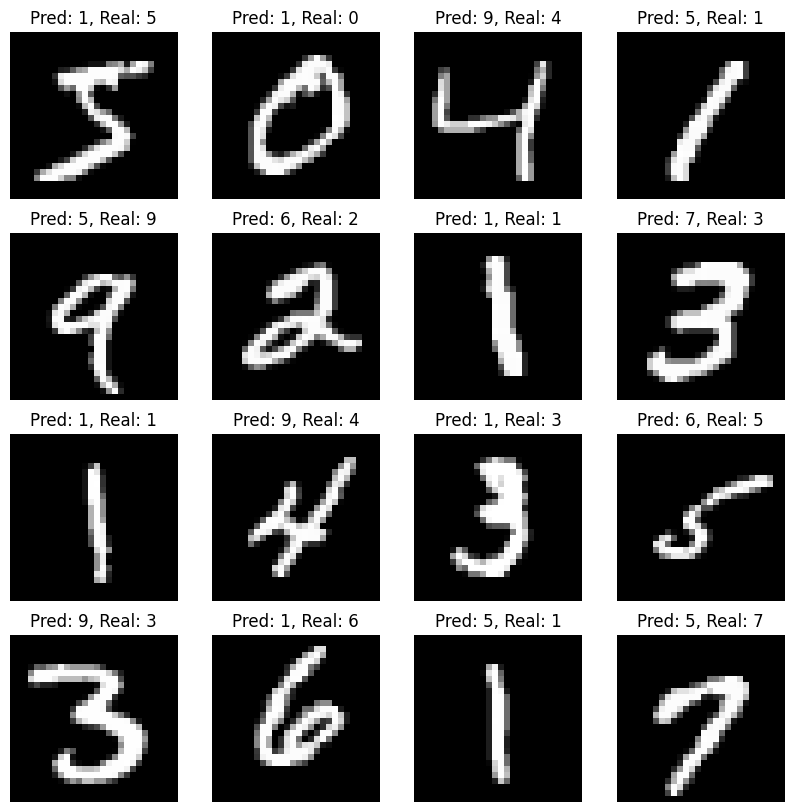

In [58]:
import matplotlib.pyplot as plt
from importlib import reload
reload(linear_classification)

# Predict the first 16 training images
probabilities, predicted_labels = linear_classification.softmax_classifier(train_data_flatten[:, :16], weights, biases)
# Plotting the first 16 images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data_flatten[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {predicted_labels[i]}, Real: {train_labels[i]}')
    ax.axis('off')

plt.show()

### Train the Linear Classifier

Let's proceed to train your classifier. After the training, we would expect that the first 16 predictions are now all correct.

Training complete. Finial loss: 0.0005778111414778986


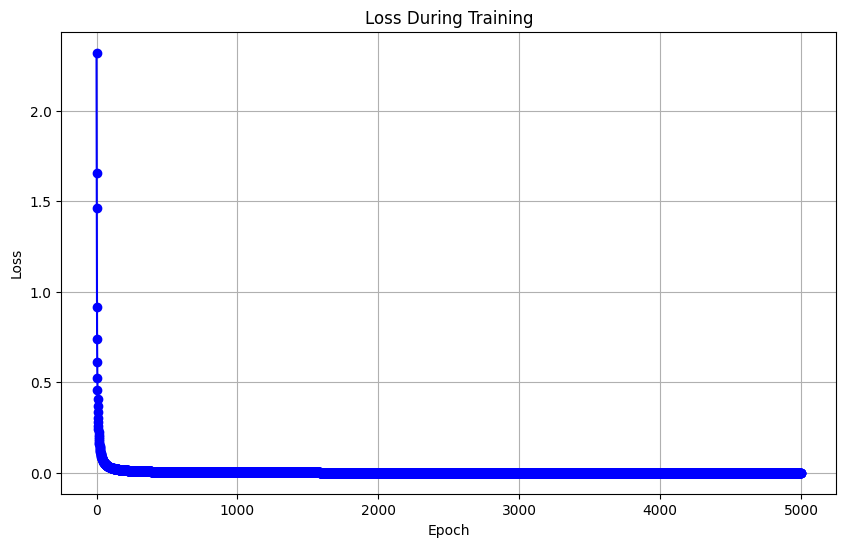

In [59]:

from hw_lib import linear_classification
from importlib import reload
reload(linear_classification)

import matplotlib.pyplot as plt

# Training parameters
learning_rate = 0.5
num_epochs = 5000

losses = []
# Training loop
for epoch in range(num_epochs):
    # Forward pass: compute predicted probabilities and loss
    loss, probabilities = linear_classification.cross_entropy_loss(train_data_flatten,
                                                                   weights, biases, train_labels)

    # Backward pass: compute gradients
    dL_dW, dL_db = linear_classification.compute_gradients(train_data_flatten, probabilities, train_labels)

    # Update weights and biases
    weights, biases = linear_classification.update_parameters(weights, biases, dL_dW, dL_db, learning_rate)

    losses.append(loss)

print(f"Training complete. Finial loss: {losses[-1]}")

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(losses, marker='o', linestyle='-', color='b')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


### Classification after Training

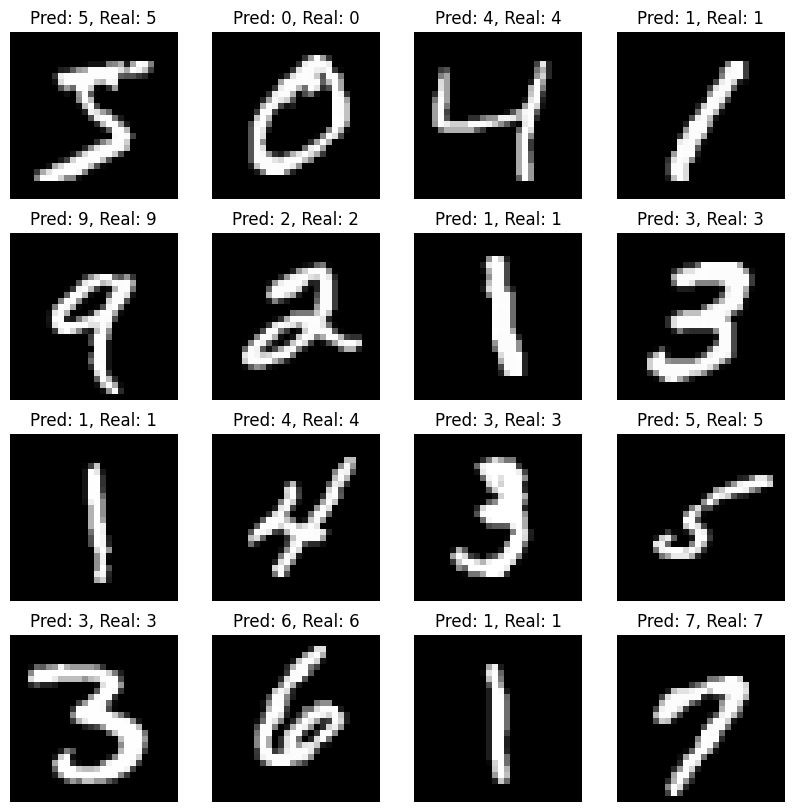

In [60]:
import matplotlib.pyplot as plt
from importlib import reload
reload(linear_classification)

# Predict the first 16 training images
probabilities, predicted_labels = linear_classification.softmax_classifier(train_data_flatten[:, :16], weights, biases)
# Plotting the first 16 images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data_flatten[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {predicted_labels[i]}, Real: {train_labels[i]}')
    ax.axis('off')

plt.show()

# Pytorch (Just for your reference; no further implementation is required)

### Pytorch Tensors

In [ ]:
import torch

# Create a tensor of size 2x3 filled with zeros
tensor_zeros = torch.zeros(2, 3)

# Create a tensor of size 2x3 filled with ones
tensor_ones = torch.ones(2, 3)

# Create a tensor from a list
tensor_from_list = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Create a tensor of size 2x3 with random values
tensor_rand = torch.rand(2, 3)

# Addition
result_add = tensor_zeros + tensor_ones

# Element-wise multiplication
result_mul = tensor_ones * tensor_rand

# Matrix multiplication
result_matmul = torch.matmul(tensor_from_list.float(), tensor_rand.t())

# Reshape a tensor
tensor_reshaped = tensor_rand.reshape(3, 2)

# Indexing
first_row = tensor_from_list[0]

# Slicing
first_column = tensor_from_list[:, 0]

# Concatenating tensors
concat_tensors = torch.cat((tensor_zeros, tensor_ones), dim=0)

# Check if CUDA is available
if torch.cuda.is_available():
    # Create a tensor for CUDA device
    tensor_cuda = torch.ones(2, 3, device="cuda:0")
    print(tensor_cuda)
else:
  print("GPU is not enabled")

### Pytorch gradient

In [ ]:
# l = z*x^2 + z*y^2
x = torch.tensor([2.0], requires_grad=True)
y = torch.tensor([3.0], requires_grad=True)
z = torch.tensor([2.0], requires_grad=False)

l = z * x**2 + z * y**2

l.backward()


print(f"{x=}")
print(f"{y=}")
print(f"{z=}")
print(f"{x.grad=}")
print(f"{y.grad=}")
print(f"{z.grad=}")

In [ ]:
import torch
import torch.nn as nn

class LinearClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc(x)
        out = self.softmax(out)
        return out


input_size = 3   # Example input size
output_size = 2   # Example output size

# Update the output size for 3 classes
output_size = 3  # Now for 3 classes

# Create an instance of the network
linear_classifier = LinearClassifier(input_size, output_size)

input_tensor = torch.randn(2, input_size)  # Batch size of 2
print(f"{input_tensor=}")

# Forward pass with the same input tensor
output = linear_classifier(input_tensor)

# To calculate the cross-entropy loss, we need a target tensor (label)
# For this example, let's create a random target label (in the range 0-2 for 3 classes)
target = torch.randint(0, 3, (2,))  # Random target class for the batch of size 1
print(f"{target=}")

# Define the cross-entropy loss function
loss_fc = nn.CrossEntropyLoss()

# Calculate the loss
loss = loss_fc(output, target)

# Output the updated output tensor and the loss
print(f"{output=}")
print(f"{loss=}")



In [ ]:
import torch

class CustomMulFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input1, input2):
        # Store inputs for backward pass
        ctx.save_for_backward(input1, input2)

        # Perform the multiplication
        return input1 * input2

    @staticmethod
    def backward(ctx, grad_output):
        # Retrieve saved inputs
        input1, input2 = ctx.saved_tensors

        # Gradient with respect to each input
        # d(output)/d(input1) = input2 and d(output)/d(input2) = input1
        grad_input1 = grad_output * input2
        grad_input2 = grad_output * input1

        return grad_input1, grad_input2

# Usage example
input1 = torch.tensor([2.0], requires_grad=True)
input2 = torch.tensor([4.0], requires_grad=True)

# Apply the custom multiplication operation
result = CustomMulFunction.apply(input1, input2)

# Backward pass
if result.nelement() == 1:
    # If scalar, no need to pass gradients to backward
    result.backward()
else:
    # If not scalar, pass a tensor of ones with the same shape as result
    grad_tensor = torch.ones_like(result)
    result.backward(grad_tensor)

# Print gradients
print("Gradient of input1:", input1.grad)
print("Gradient of input2:", input2.grad)


In [ ]:
from torch.autograd import gradcheck
# Create small tensors for checking, set requires_grad=True
input1 = torch.randn(4, 16, dtype=torch.double, requires_grad=True)
input2 = torch.randn(4, 16, dtype=torch.double, requires_grad=True)
# Check gradients
test = gradcheck(CustomMulFunction.apply, (input1, input2), eps=1e-6, atol=1e-4)
print(test)  # This will print True if the gradient check passes

In [ ]:
import torch

class CustomReLU(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

# Usage example
input = torch.tensor([-1.0, 0.5, 2.0], requires_grad=True)

# Apply the custom ReLU operation
result = CustomReLU.apply(input)

# Check if result is a scalar or a tensor with more than one element
if result.nelement() == 1:
    # If scalar, no need to pass gradients to backward
    result.backward()
else:
    # If not scalar, pass a tensor of ones with the same shape as result
    grad_tensor = torch.ones_like(result)
    result.backward(grad_tensor)

# Print gradient
print("Gradient:", input.grad)


In [ ]:
from torch.autograd import gradcheck
# Create small tensors for checking, set requires_grad=True
input = torch.randn(4, 16, dtype=torch.double, requires_grad=True)
# Check gradients
test = gradcheck(CustomReLU.apply, (input), eps=1e-6, atol=1e-4)
print(test)  # This will print True if the gradient check passes

# Two-Layer Neural Network (50 pts)

The two-layer network architecture consists of a sequence: linear layer, ReLU activation, another linear layer, and finally a softmax function. You will need to implement this by utilizing the `torch.nn` library for convenience and from scratch for a deeper understanding of the underlying operations.

## Implement a Two-Layer Neural Network Using PyTorch (50 pts)

#### Test on a toy example (25 pts)


We begin by creating some toy inputs and labels. There are 3 data samples, each with a feature dimension of 4. Given that there are two classes, the class labels will be either 0 or 1.

**NOTE:** It's important to note that the dimensionality of the data we generated is structured as `num_of_samples` $\times$ `input_size`, which does not align with the format presented in our lecture slides. In this setup, the number of rows corresponds to the number of input samples, while the number of columns represents the feature dimensions.

In [91]:
import torch

num_of_samples = 3
input_size = 4   # Example input size
hidden_size = 5   # Size of the hidden layer
output_size = 2   # Example output size, we have two classes
torch.manual_seed(0)
# Generate some random inputs and labels
X = torch.randn(num_of_samples, input_size)
labels = torch.tensor([0, 1, 0], dtype=torch.int64)

**-----IMPLEMENTATION NEEDED----- (25 pts)**

In this section, you are required to implement the `TwoLayerNet` class within `neural_network.py`. Your initial task is to code the `__init__` and `forward` methods, enabling the initialization of the network and the processing of inputs through it. Further details and instructions can be found in the class's docstrings.

In [92]:
import numpy as np
from hw_lib import neural_network
from importlib import reload
reload(neural_network)

two_layer_net = neural_network.TwoLayerNet(input_size, hidden_size, output_size)

output = two_layer_net(X)


Let's put everything togerther to train the network.

In [93]:
from importlib import reload
reload(neural_network)

learning_rate = 0.5
number_of_training_iterations = 100
two_layer_net = neural_network.TwoLayerNet(input_size, hidden_size, output_size)
final_loss = two_layer_net.train(X, labels, learning_rate,
                                 number_of_training_iterations, verbose=False)

assert final_loss < 0.334

Initial loss loss=tensor(1.2248, grad_fn=<NllLossBackward0>)
Final loss=tensor(0.0170, grad_fn=<NllLossBackward0>)


#### Test on MNIST dataset (25 pts)

##### Download MNIST Data and initialize a two-layer network

Here we only use the first 100 images for training

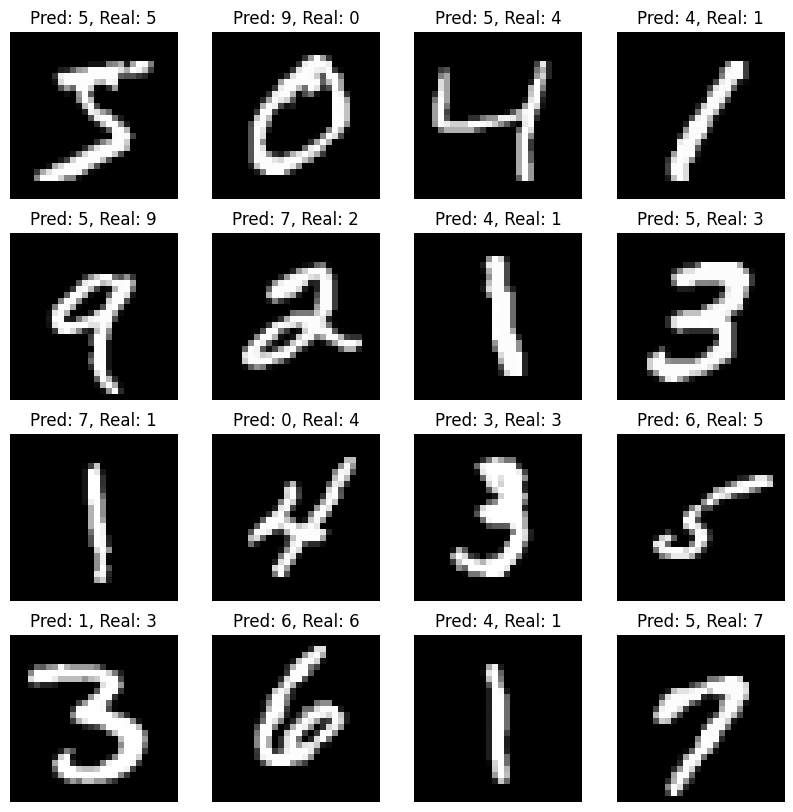

In [98]:
import torch
import torchvision
from torchvision.transforms import ToTensor
import numpy as np
from importlib import reload
reload(neural_network)

# Load MNIST data
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, transform=ToTensor(), download=True)

# Preprocess and extract the first 100 images and labels
train_data = mnist_train.data[:100].float()
# Reshape data to 2D array where each column is a data sample
train_data_flatten = train_data.view(100, -1).numpy()
train_labels = mnist_train.targets[:100].numpy()

# Normalize the data
train_data /= 255.0


input_size = train_data_flatten.shape[1]
hidden_size = 50
output_size = 10
X = torch.from_numpy(train_data_flatten)
labels = torch.from_numpy(train_labels)
two_layer_net = neural_network.TwoLayerNet(input_size, hidden_size, output_size)


import matplotlib.pyplot as plt
# Predict the first 16 training images
probabilities = two_layer_net(X[:16, :])
_, predicted_labels = torch.max(probabilities, dim=1)

# Plotting the first 16 images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data_flatten[i, :].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {predicted_labels[i]}, Real: {train_labels[i]}')
    ax.axis('off')

plt.show()

##### Train two-layer network

Initial loss loss=tensor(2.4513, grad_fn=<NllLossBackward0>)
Final loss=tensor(0.0005, grad_fn=<NllLossBackward0>)


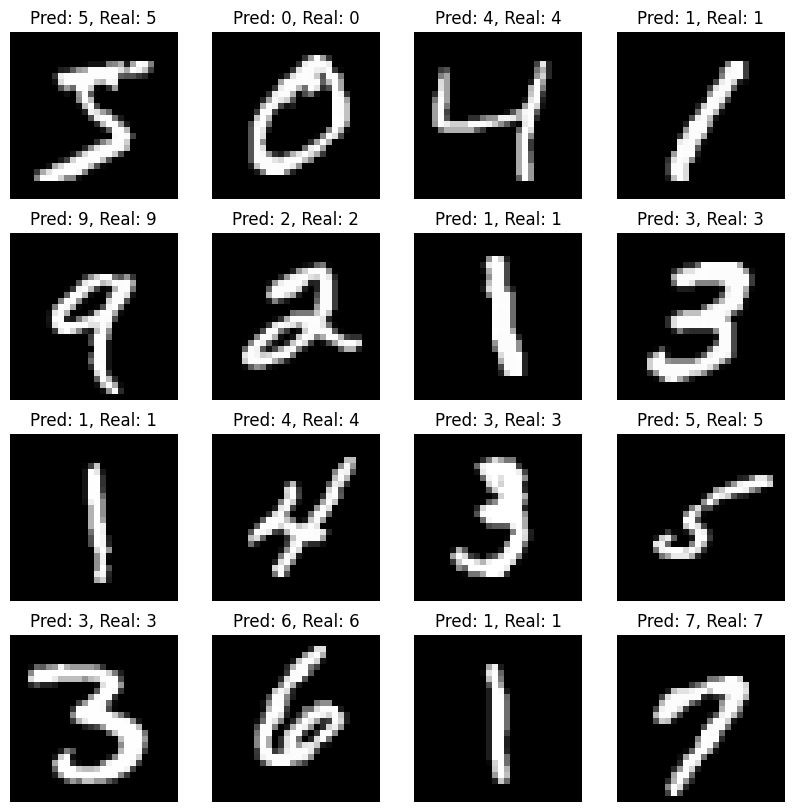

In [99]:
learning_rate = 0.5
number_of_training_iterations = 1000

final_loss = two_layer_net.train(X, labels, learning_rate,
                                 number_of_training_iterations, verbose=False)

import matplotlib.pyplot as plt
# Predict the first 16 training images
probabilities = two_layer_net(X[:16, :])
_, predicted_labels = torch.max(probabilities, dim=1)

# Plotting the first 16 images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data_flatten[i, :].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {predicted_labels[i]}, Real: {train_labels[i]}')
    ax.axis('off')

plt.show()

## Implemet Two layer Neural Network from scratch (Optional, won't be graded)

#### Test on a toy example (0 pts)

We begin by creating some toy inputs and labels. There are 3 data samples, each with a feature dimension of 4. Given that there are two classes, the class labels will be either 0 or 1.

**NOTE:** It's important to note that the dimensionality of the data we generated is structured as `input_size` $\times$ `num_of_samples`, which does align with the format presented in our lecture slides. In this setup, the number of columns corresponds to the number of input samples, while the number of rows represents the feature dimensions.

In [96]:
import torch

num_of_samples = 3
input_size = 4   # Example input size
hidden_size = 5   # Size of the hidden layer
output_size = 2   # Example output size, we have two classes
torch.manual_seed(0)
# Generate some random inputs and labels
X = torch.randn(input_size, num_of_samples, dtype=torch.float64)
labels = torch.tensor([0, 1, 0], dtype=torch.int64)

Implement `relu`, `softmax`, `cross_entropy_loss` in `neural_network_scratch.py` and pass the tests below **(5 pts)**

In [97]:
import numpy as np
from hw_lib import neural_network_scratch
from importlib import reload
reload(neural_network_scratch)

two_layer_net = neural_network_scratch.TwoLayerNet(input_size, hidden_size, output_size)


# Test relu
s1 = torch.Tensor([[0.5, 10.0], [0.5, -10.0]]).double()
h1 = two_layer_net.relu(s1)
print(f"{h1.numpy()=}")
expected_h1 = np.array([[0.5, 10.0],
       [0.5, 0]])
assert np.allclose(h1, expected_h1)
assert h1.dtype == torch.float64

# Test softmax
s2 = torch.Tensor([[0.5, 10], [0.5, -10]]).double()
probs = two_layer_net.softmax(s2)
print(f"{probs.numpy()=}")
expected_probs = np.array([[5.0000000e-01, 1.0000000e+00],
       [5.0000000e-01, 2.0611537e-09]])
assert np.allclose(probs, expected_probs)
assert probs.dtype == torch.float64

# Test cross_entropy_loss
loss = two_layer_net.cross_entropy_loss(torch.Tensor([[np.exp(1.0), 10.0], [0.5, np.exp(2.0)]]).double(),
                                        torch.tensor([0, 1], dtype=torch.int64))
print(f"{loss.numpy()=}")
expected_loss = -(1.0 + 2.0) / 2
assert np.allclose(loss, expected_loss)
assert loss.dtype == torch.float64

AttributeError: 'NoneType' object has no attribute 'numpy'

Implement `forward` and `generate_one_hot` in `neural_network_scratch.py` and pass the tests below **(5 pts)**

In [ ]:
import numpy as np
from hw_lib import neural_network_scratch
from importlib import reload
reload(neural_network_scratch)

two_layer_net = neural_network_scratch.TwoLayerNet(input_size, hidden_size, output_size)

# Test forwarding
probabilies = two_layer_net.forward(X)
print(f"{probabilies.numpy()=}")
expected_probabilies = np.array([[0.50000006, 0.49999997, 0.49999997],
       [0.49999997, 0.5       , 0.50000006]])
assert np.allclose(probabilies, expected_probabilies)
assert probabilies.dtype == torch.float64

# Test onehot vector generation
one_hot = two_layer_net.generate_one_hot(shape=(2, 3), labels=labels)
expected_one_hot = np.array([[1., 0., 1.],
        [0., 1., 0.]])
print(f"{one_hot.numpy()=}")
assert np.allclose(one_hot, expected_one_hot)
assert one_hot.dtype == torch.float64, f"{one_hot.dtype=}"


Implement `forward_backward` in `neural_network_scratch.py` and pass the tests below **(15 pts)**

In [ ]:
from importlib import reload
reload(neural_network_scratch)

two_layer_net_gradient_test = neural_network_scratch.TwoLayerNet(input_size, hidden_size, output_size)
two_layer_net_gradient_test.forward_backward(X, labels)

# Use numerical gradient check
numerical_grads = two_layer_net_gradient_test.numerical_gradient(X, labels)
assert np.allclose(two_layer_net_gradient_test.dL_db2, numerical_grads['b2']) # 5 pts

In [ ]:
assert np.allclose(two_layer_net_gradient_test.dL_dW2, numerical_grads['W2']) # 5 pts

In [ ]:
assert np.allclose(two_layer_net_gradient_test.dL_db1, numerical_grads['b1']) # 2.5 pts

In [ ]:
assert np.allclose(two_layer_net_gradient_test.dL_dW1, numerical_grads['W1']) # 2.5 pts

#### Test on MNIST dataset (0 pts)

##### Download MNIST Data and initialize a two-layer network

Here we only use the first 100 images for training

In [ ]:
import torch
import torchvision
from torchvision.transforms import ToTensor
import numpy as np
from importlib import reload
reload(neural_network_scratch)


# Load MNIST data
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, transform=ToTensor(), download=True)

# Preprocess and extract the first 100 images and labels
train_data = mnist_train.data[:100].float()
# Reshape data to 2D array where each column is a data sample
train_data_flatten = train_data.view(100, -1).t().numpy()
train_labels = mnist_train.targets[:100].numpy()

# Normalize the data
train_data /= 255.0

input_size = train_data_flatten.shape[0]
hidden_size = 50
output_size = 10
X = torch.from_numpy(train_data_flatten).double()
labels = torch.from_numpy(train_labels)
two_layer_net_training = neural_network_scratch.TwoLayerNet(input_size, hidden_size, output_size)
probabilities = two_layer_net_training.forward(X)
_, predicted_labels = torch.max(probabilities, dim=0)

# Plotting the first 16 images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data_flatten[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {predicted_labels[i]}, Real: {train_labels[i]}')
    ax.axis('off')

plt.show()

##### Train two-layer network

In [ ]:
import matplotlib.pyplot as plt

losses = two_layer_net_training.training(X, labels, learning_rate=0.1, iterations=1000)

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(losses, marker='o', linestyle='-', color='b')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


# Predict the first 16 training images
probabilities = two_layer_net_training.forward(X)
_, predicted_labels = torch.max(probabilities, dim=0)

# Plotting the first 16 images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data_flatten[:, i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {predicted_labels[i]}, Real: {train_labels[i]}')
    ax.axis('off')

plt.show()